Sentiment alanysis is a common task in Natural Language Processsing. 

In [3]:
import numpy as np
from keras.datasets import imdb
import matplotlib.pyplot as plt
(X_train,y_train),(X_test,y_test) = imdb.load_data()
X = np.concatenate((X_train,X_test),axis=0)
y= np.concatenate((y_train,y_test),axis=0)
print(X.shape,y.shape)

17416192/17464789 [============================>.] - ETA: 0s(50000,) (50000,)


In [4]:
print("Classes: ",np.unique(y))
print("Number of words ",len(np.unique(np.hstack(X))))

Classes:  [0 1]
Number of words  88585


In [31]:
result = list(map(len,X))
# Summarize number of words
print("Review length: ")
print("Mean %.2f words (%f)" %(np.mean(result),np.std(result)))

Review length: 
Mean 234.76 words (172.911495)


## Plot review length

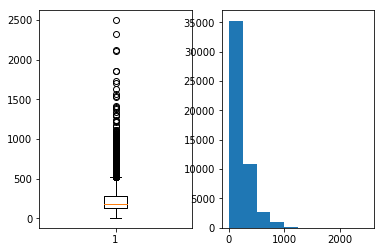

In [44]:
plt.subplot(121)
plt.boxplot(result)
plt.subplot(122)
plt.hist(result)
plt.show()

In [46]:
# load library
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
seed =7
np.random.seed(seed)

In [48]:
# load the dataset but keep the top n words, zero the rest
top_words = 5000
(X_train,y_train),(X_test,y_test) = imdb.load_data(num_words=top_words)

# Word Embeddings
This technique encodes a real_valued vector in a high dimmensional space. Keras uses **Embedding ** layer to convert positive integer representations of words into word embedding. The layer determines the mapping including the maximum number of expected words or the vocabulary. In this notebook, we use a vocabulary of 5000 most used word in the dataset.

In [49]:
max_words = 500
X_train = sequence.pad_sequences(X_train,maxlen= max_words)
X_test = sequence.pad_sequences(X_test,maxlen=max_words)

In [50]:
X_train

array([[   0,    0,    0, ...,   19,  178,   32],
       [   0,    0,    0, ...,   16,  145,   95],
       [   0,    0,    0, ...,    7,  129,  113],
       ..., 
       [   0,    0,    0, ...,    4, 3586,    2],
       [   0,    0,    0, ...,   12,    9,   23],
       [   0,    0,    0, ...,  204,  131,    9]], dtype=int32)

## Create model

In [52]:
def create_model():
    model = Sequential()
    model.add(Embedding(top_words,32,input_length = max_words))
    model.add(Flatten())
    model.add(Dense(250,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    print(model.summary())
    model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=2, batch_size=120,verbose=1)
    return model

model = create_model()
scores = model.evaluate(X_test,y_test,verbose=0)
print("Accuracy %.2f%%" % (scores[1]*100))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               4000250   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None
Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 80s - loss: 0.5066 - acc: 0.7188 - val_loss: 0.3083 - val_acc: 0.8666
Epoch 2/2
25000/25000 [==============================] - 79s - loss: 0.2148 - acc:

## One dimensional Convolutional neural network   
CNN is designed to maintain the spatial structure of image data whilst being robust to the position and orientation of learned objects in the scene. This same principle can be used on sequences, such as the one dimensional sequence of word in Natural Language Processing, e.g., movie review sentiments. Keras provides Convolution1D and MaxPooling1D classes for this task.


In [53]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Convolution1D, MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

seed =7
np.random.seed(seed)

In [55]:
top_words = 500
(X_train,y_train),(X_test,y_test) =imdb.load_data(num_words=top_words)
# pad reviews
max_words =500
X_train = sequence.pad_sequences(X_train,maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [57]:
def create_model():
    model = Sequential()
    model.add(Embedding(top_words,32, input_length = max_words))
    model.add(Convolution1D(nb_filter=32,filter_length=3, border_mode='same',activation='relu'))
    model.add(MaxPooling1D(pool_length=2))
    model.add(Flatten())
    model.add(Dense(250,activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    print(model.summary())
    model.fit(X_train,y_train,validation_data =(X_test,y_test),epochs=2,batch_size=128,verbose=1)
    return model
model = create_model()
scores = model.evaluate(X_test,y_test, verbose=0)
print("Accuracy %.2f%%"% (scores[1]*100) )

/home/tri/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(filters=32, activation="relu", kernel_size=3, padding="same")`
  after removing the cwd from sys.path.
/home/tri/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=2)`
  """


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 32)           16000     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 250)               2000250   
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 251       
Total params: 2,019,605
Trainable params: 2,019,605
Non-trainable params: 0
_________________________________________________________________
